In [46]:
inf = float('inf')

### **최소신장트리**
그래프 내 모든 정점을 포함하는 트리(신장트리)들 중, 간선의 가중치 합의 최소인 트리

In [47]:
edges = [
    (0, 1, 9), (0, 2, 10), (1, 3, 10), (1, 4, 5),
    (1, 6, 3), (2, 3, 9), (2, 4, 7), (2, 5, 2),
    (3, 5, 4), (3, 6, 8), (4, 6, 1), (5, 6, 6)
]

#### **kruskal 알고리즘**
모든 간선을 가중치 기준으로 오름차순으로 정렬하고 가중치가 적은 간선부터 MST에 추가하는 알고리즘  
간선 중심으로 최소 신장 트리를 찾아나간다. $O(ElogE)$

In [48]:
weights = sorted(edges, key=lambda t: t[2], reverse=True)    # 가중치 작은 순서대로 정렬
print(weights)

mst = []    # 최소 신장 트리
N = 7       # 정점 갯수
parents = list(range(N))

def find(u):
    if u != parents[u]:
        parents[u] = find(parents[u])
    return parents[u]

def union(u, v):
    print(f"{u=}, {v=}, ", end='')
    u = find(u)
    v = find(v)
    print(f"p_u={u}, p_v={v}")
    parents[v] = u
    print(parents)
    print()
    
cnt = 0
cost = 0

while cnt < N - 1:  # 정점이 N개면 최소 신장 트리의 간선은 N - 1개.
    u, v, wgt = weights.pop()   # reverse한 이유; 뒤에서부터 가져오니까
    
    if find(u) != find(v):
        union(u, v)
        mst.append((u, v))  # 그리디하게
        cost += wgt
        cnt += 1
    
print(mst)
print(cost)

[(0, 2, 10), (1, 3, 10), (0, 1, 9), (2, 3, 9), (3, 6, 8), (2, 4, 7), (5, 6, 6), (1, 4, 5), (3, 5, 4), (1, 6, 3), (2, 5, 2), (4, 6, 1)]
u=4, v=6, p_u=4, p_v=6
[0, 1, 2, 3, 4, 5, 4]

u=2, v=5, p_u=2, p_v=5
[0, 1, 2, 3, 4, 2, 4]

u=1, v=6, p_u=1, p_v=4
[0, 1, 2, 3, 1, 2, 4]

u=3, v=5, p_u=3, p_v=2
[0, 1, 3, 3, 1, 2, 4]

u=5, v=6, p_u=3, p_v=1
[0, 3, 3, 3, 1, 3, 1]

u=0, v=1, p_u=0, p_v=3
[0, 3, 3, 0, 3, 3, 3]

[(4, 6), (2, 5), (1, 6), (3, 5), (5, 6), (0, 1)]
25


#### **prim 알고리즘**
임의의 시작 노드에서 출발해서 인접한 노드 중 가중치가 작은 노드를 선택해 해당 간선을 MST에 추가하는 알고리즘  
정점 중심으로 최소 신장 트리를 찾아나간다. $O(ElogV)$

In [49]:
adj = [[inf] * N for _ in range(N)]

for u, v, w in edges:
    adj[u][v] = w
    adj[v][u] = w
    
for i in range(N):
    for j in range(N):
        print(f"{adj[i][j]:3}", end=' ')
    print()

inf   9  10 inf inf inf inf 
  9 inf inf  10   5 inf   3 
 10 inf inf   9   7   2 inf 
inf  10   9 inf inf   4   8 
inf   5   7 inf inf inf   1 
inf inf   2   4 inf inf   6 
inf   3 inf   8   1   6 inf 


In [50]:
# prim
def prim(vtx, adj, start):
    n = len(vtx)
    selected = [False] * n
    D = [inf] * n
    D[start] = 0
    
    for _ in range(n):  # n개의 정점을 지나서 MST에 넣어야 종료
        u = get_min_vtx(D, selected, start)
        selected[u] = True
        print(u, end=' ')
        
        for v in range(n):
            if adj[u][v] != inf:    
                if not selected[v]: # 그리디하게
                    D[v] = min(D[v], adj[u][v])
                    
        print(D)    # 중간 결과 출력
        
def get_min_vtx(D, selected, start):
    min_dist = inf
    min_idx = start
    
    for v in range(len(D)):
        if selected[v] == False and min_dist > D[v]:
            min_dist = D[v]
            min_idx = v
            
    return min_idx

In [51]:
vertex = ["A", "B", "C", "D", "E", "F", "G"]
prim(vertex, adj, 0)

0 [0, 9, 10, inf, inf, inf, inf]
1 [0, 9, 10, 10, 5, inf, 3]
6 [0, 9, 10, 8, 1, 6, 3]
4 [0, 9, 7, 8, 1, 6, 3]
5 [0, 9, 2, 4, 1, 6, 3]
2 [0, 9, 2, 4, 1, 6, 3]
3 [0, 9, 2, 4, 1, 6, 3]


### **해싱**

해싱이란 해시 함수를 사용하여 변환한 값을 인덱스로 삼아 키와 값을 저장해서 빠른 데이터 탐색을 제공하는 방법

- 해시 충돌: 해시 함수에 의해 주어진 버킷 주소가 같을 경우
- 군집화: 해시 원소 값이 테이블에 연달아 저장된 상태(해쉬 충돌로 삽입이 연달아 되어서)

**오버 플로를 처리하는 방법**
- 개방 주소법: 충돌 발생 시 그 항목을 다른 주소에 저장
    - 선형 조사법: 주소를 1씩 증가
    - 이차 조사법: 주소를 제곱 순으로 증가
    - 이중 해싱법
- 체이닝: 해시 테이블의 하나의 위치에 여러 개의 항목을 저장할 수 있도록 테이블의 구조 변경, 해시 테이블 공간 활용성이 느려지고 성능 감소

#### **해시 함수**
임의의 길이를 갖는 데이터를 고정된 길이의 데이터로 바꿔주는 함수
- 충돌이 적게 발생하고
- 계산이 빨라야 하고
- 테이블의 주소 영역에서 고르게 분포해야함

주로 $h(k) = k \, mod \, M$ 과 같은 제산 함수 사용

In [1]:
M = 13
hash = lambda k: k % M
hashtable = [None] * M

#### **선형조사법_삽입 연산**
<img src="image-1.png" alt="image" width="700">

주소를 순서에 따라 조사하며 빈 슬롯을 찾음

In [8]:
def lp_insert(key):
    id = hash(key)
    count = M
    
    while count > 0 and (hashtable[id] is not None and hashtable[id] != -1):    # 뭐가 들어있다면
        id = (id + 1 + M) % M
        count -= 1
    
    if count > 0:
        hashtable[id] = key

In [9]:
for key in [45, 27, 88, 9, 71, 60, 46, 38, 24]:
    lp_insert(key)
    print(key, "삽입:", hashtable)

45 삽입: [24, 27, 45, 27, 88, 9, 45, 71, 60, 9, 88, 46, 38]
27 삽입: [24, 27, 45, 27, 88, 9, 45, 71, 60, 9, 88, 46, 38]
88 삽입: [24, 27, 45, 27, 88, 9, 45, 71, 60, 9, 88, 46, 38]
9 삽입: [24, 27, 45, 27, 88, 9, 45, 71, 60, 9, 88, 46, 38]
71 삽입: [24, 27, 45, 27, 88, 9, 45, 71, 60, 9, 88, 46, 38]
60 삽입: [24, 27, 45, 27, 88, 9, 45, 71, 60, 9, 88, 46, 38]
46 삽입: [24, 27, 45, 27, 88, 9, 45, 71, 60, 9, 88, 46, 38]
38 삽입: [24, 27, 45, 27, 88, 9, 45, 71, 60, 9, 88, 46, 38]
24 삽입: [24, 27, 45, 27, 88, 9, 45, 71, 60, 9, 88, 46, 38]


#### **선형조사법_탐색 연산**
<img src="image-1.png" alt="image" width="500">  

해당 키의 값을 찾거나 값이 없는 버킷을 만나거나 모든 버킷을 다 검사

In [12]:
def lp_search(key):
    id = hash(key)
    count = M
    
    while count > 0:
        if hashtable[id] is None:
            return None
        elif hashtable[id] != -1 and hashtable[id] == key:
            return hashtable[id]
        
        id = (id + 1 + M) % M
        count -= 1
    
    return None

#### **선형조사법_삭제 연산**

<img src="image-2.png" alt="image" width="500">  

빈 버킷을 두 가지(사용했던 것과 한 번도 사용 안했던 것)으로 분류

In [16]:
def lp_delete(key):
    id = hash(key)
    count = M
    
    while count > 0:
        if hashtable[id] is None:
            return None
        elif hashtable[id] != -1 and hashtable[id] == key:
            hashtable[id] = -1
            return

        id = (id + 1 + M) % M
        count -= 1            

In [17]:
print(hashtable)
lp_delete(60)
print("60 삭제:", hashtable)

[24, 27, 45, 27, 88, 9, 45, 71, 60, 9, 88, 46, 38]
60 삭제: [24, 27, 45, 27, 88, 9, 45, 71, -1, 9, 88, 46, 38]


### **최단경로 찾기**

#### **dijkstra**

주어진 가중치 그래프에서 임의로 정한 출발점에서 도착점까지의 최단 경로 찾기  
그리디하게 정점을 선택해 방문하고, 선택한 정점의 방문하지 않은 인접 정점들을 찾아 간선 완화를 수행함.  

MSTprim 알고리즘과 유사하나 차이점 존재
- dijkstra는 출발점이 있으나 prim은 임의의 점에서 시작
- prim에서는 D에 간선의 가중치를 저장하고 (`D[v] = min(D[v], adj[u][v])`), dijkstra는 D에 출발점으로부터의 거리를 저장. (`D[v] = D[u] + adj[u][v]`)

```py
start := 시작점
D := 시작점으로부터의 거리 배열
visited := 방문 여부 배열

for 모든 정점:
    min_vertex := 방문하지 않은 점 중 가장 D[i]가 적은 정점

    for 간선 in min_vertex 의 인접 간선:
        if 방문하지 않음:
            if 기존 거리 > min_vertex 거치는 거리:
                기존 거리 = min_vertex 거치는 거리
```

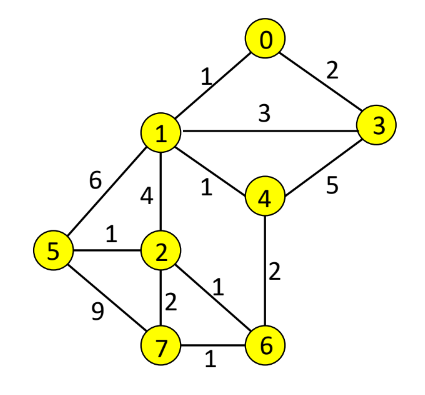

In [13]:
graph = [
    [(1, 1), (3, 2)],
    [(0, 1), (2, 4), (3, 3), (4, 1), (5, 6)],
    [(1, 4), (5, 1), (6, 1), (7, 2)],
    [(0, 2), (1, 3), (4, 5)],
    [(1, 1), (3, 5), (6, 2)],
    [(1, 6), (2, 1), (7, 9)],
    [(2, 1), (4, 2), (7, 1)],
    [(2, 2), (5, 9), (6, 1)]
]
N = len(graph)

In [14]:
start = 0
D = [inf] * N
V = [False] * N
P = [None] * N

D[start] = 0
P[start] = start

for _ in range(N):
    min_vertex = -1
    min_dist = inf
    for i in range(N):
        if not V[i] and min_dist > D[i]:
            min_dist = D[i]
            min_vertex = i
    
    V[min_vertex] = True
    for v, wt in graph[min_vertex]:
        if not V[v]:
            if D[v] > D[min_vertex] + wt:
                D[v] = D[min_vertex] + wt
                P[v] = min_vertex

In [15]:
for i in range(N):
    if D[i] == inf:
        print(f"({start}, {i}) 는 경로 없음")
    else:
        print(f"({start}, {i}) = {D[i]}")

(0, 0) = 0
(0, 1) = 1
(0, 2) = 5
(0, 3) = 2
(0, 4) = 2
(0, 5) = 6
(0, 6) = 4
(0, 7) = 5


In [16]:
for i in range(N):
    curr = i
    print(curr, end='')
    while curr != start:
        curr = P[curr]
        print(f" <- {curr}", end='')
    print()

0
1 <- 0
2 <- 1 <- 0
3 <- 0
4 <- 1 <- 0
5 <- 2 <- 1 <- 0
6 <- 4 <- 1 <- 0
7 <- 6 <- 4 <- 1 <- 0


##### **dijkstra의 문제점**

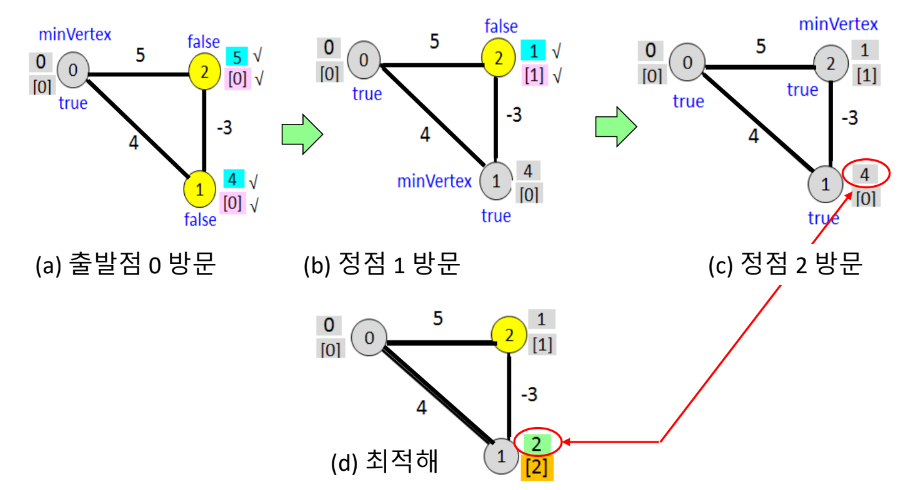  
음수 가중치에서 제대로된 최적해를 구하지 못함
- dijkstra가 그리디하게 정점 인덱스 순으로 min_vertex를 선택했기 때문
- dijkstra는 D를 한 번 방문된 정점에 대해서는 다시 갱신하지 않기 때문

#### **Floyd-Warshall**

Floyd-warshall 알고리즘은 모든 정점쌍에 대해 최단 경로를 계산함. $O(n^3)$
- 이는 출발점을 0부터 n-1까지 dijkstra를 실행하는 것으로도 모든 쌍에 대한 최단 경로를 구할 수도 있음.

```py
for k in 모든 정점:
    for i in 모든 정점:
        for j in 모든 정점:
            D[i][j] = min(D[i][j], D[i][k] + D[k][j])
```

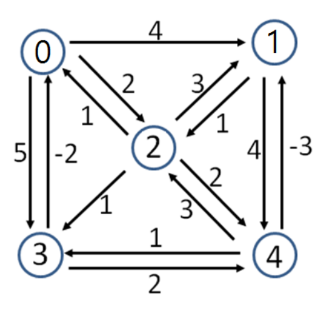

In [17]:
D = [[0, 4, 2, 5, inf],
     [inf, 0, 1, inf, 4],
     [1, 3, 0, 1, 2],
     [-2, inf, inf, 0, 2],
     [inf, -3, 3, 1, 0]]
N = len(D)

for k in range(N):
    for i in range(N):
        for j in range(N):
            D[i][j] = min(D[i][j], D[i][k] + D[k][j])

for d in D:
    print(d)

[0, 1, 2, 3, 4]
[0, 0, 1, 2, 3]
[-1, -1, 0, 1, 2]
[-2, -1, 0, 0, 2]
[-3, -3, -2, -1, 0]


### **예제**

#### **[괄호 삽입](https://leetcode.com/problems/different-ways-to-add-parentheses/)**

In [18]:
def bracket(expression: str) -> list[int]:
    result = []
    
    if expression.isdigit():
        return [int(expression)]
    
    for i in range(len(expression)):
        if expression[i] in "+-*":
            left = bracket(expression[:i])
            right = bracket(expression[i + 1:])
            
            for l in left:
                for r in right:
                    result.append(eval(f"{l}{expression[i]}{r}"))
    
    return result

In [40]:
def bracket(expr: str) -> list[int]:
	def calc(left: list[int], right: list[int], oper: str) -> list[int]:
		ret = []
		for l in left:
			for r in right:
				ret.append(eval(f"{l}{oper}{r}"))
		return ret
	
	if expr.isdigit():
		return [int(expr)]
	
	ret = []
	
	for i in range(len(expr)):
		if expr[i] in "+-*":
			left = bracket(expr[:i])
			right = bracket(expr[i+1:])
			ret.extend(calc(left, right, expr[i]))
	
	return ret	

In [41]:
print(bracket("2-1-1"))
print(bracket("2*3-4*5"))

[2, 0]
[-34, -10, -14, -10, 10]


#### **[최소 연산 경로](https://www.acmicpc.net/problem/25418)**

In [42]:
def min_operation(a: int, k: int) -> int:
    # D = [inf] * (k + 1)
    # D[a] = 0
    D = [0] * (k + 1)
    
    for i in range(a + 1, k + 1):
        # if i % 2 == 0 and i // 2 >= a:
        #     D[i] = min(D[i - 1], D[i // 2]) + 1
        # else:
        #     D[i] = D[i - 1] + 1
        D[i] = D[i - 1] + 1
        if i % 2 == 0 and i // 2 >= a:
            D[i] = min(D[i], D[i // 2] + 1)
    
    return D[k]

In [43]:
print(min_operation(5, 10))
print(min_operation(7, 77))
print(min_operation(1111, 997651))

1
7
850


##### 최소 연산 경로 역추적

In [3]:
def min_operation_back_track(a: int, k: int) -> tuple[int, list[int]]:
    # D = [inf] * (k + 1)
    # D[a] = 0
    D = [0] * (k + 1)
    
    for i in range(a + 1, k + 1):
        # if i % 2 == 0 and i // 2 >= a:
        #     D[i] = min(D[i - 1], D[i // 2]) + 1
        # else:
        #     D[i] = D[i - 1] + 1
        D[i] = D[i - 1] + 1
        if i % 2 == 0 and i // 2 >= a:
            D[i] = min(D[i], D[i // 2] + 1)
    
    path = []
    now = k
    
    while now != a:
        path.append(now)
        # if now % 2 == 0 and now // 2 >= a and D[now // 2] < D[now - 1]:
        #     now //= 2
        # else:
        #     now -= 1
        if now % 2 == 0 and now // 2 >= a:
            now //= 2
        else:
            now -= 1
    
    path.append(a)
    path.reverse()
    
    return len(path), path

In [4]:
print(*min_operation_back_track(5, 10))
print(*min_operation_back_track(7, 77))
print(*min_operation_back_track(1111, 997651))

2 [5, 10]
8 [7, 8, 9, 18, 19, 38, 76, 77]
851 [1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269,

In [7]:
a, k = map(int, input().split())

cnt = 0
now = k
while now != a:
    cnt += 1
    if now % 2 == 0 and now // 2 >= a:
        now //= 2
    else:
        now -= 1

print(cnt)

850


#### **[섬의 개수](https://leetcode.com/problems/number-of-islands/description/)**

In [34]:
def count_island(grid: list[list[str]]) -> int:
    # visited 쓰지 말고 그냥 탐색한 섬은 grid의 값을 1 대신 0으로 만들게 해도 될 듯
    m = len(grid)
    n = len(grid[0])
    
    # def dfs(i: int, j: int):
    #     grid[i][j] = 0
        
    #     for di, dj in [(-1, 0), (1, 0), (0, 1), (0, -1)]:
    #         if 0 <= i + di < m and 0 <= j + dj < n:
    #             if grid[i + di][j + dj] == '1':
    #                 dfs(i + di, j + dj)
    
    def dfs_teacher(i: int, j: int):
        if i < 0 or i >= m or j < 0 or j >= n or grid[i][j] != '1':
            return
        
        grid[i][j] = 0
        
        dfs_teacher(i + 1, j)
        dfs_teacher(i, j + 1)
        dfs_teacher(i - 1, j)
        dfs_teacher(i, j - 1)
    
    cnt = 0
    for i in range(m):
        for j in range(n):
            if grid[i][j] == '1':
                # dfs(i, j)
                dfs_teacher(i, j)
                cnt += 1
    
    return cnt

In [36]:
def sol(grid: list[list[str]]) -> int:
	m = len(grid)
	n = len(grid[0])

	def dfs(i: int, j: int):
		if not(0 <= i < m) or not(0 <= j < n) or grid[i][j] != "1":
			return
		
		grid[i][j] = "0"
		
		dfs(i + 1, j)
		dfs(i - 1, j)
		dfs(i, j + 1)
		dfs(i, j - 1)

	cnt = 0
	for i in range(m):
		for j in range(n):
			if grid[i][j] == "1":
				dfs(i, j)
				cnt += 1
	
	return cnt

In [37]:
print(sol([
  ["1","1","1","1","0"],
  ["1","1","0","1","0"],
  ["1","1","0","0","0"],
  ["0","0","0","0","0"]
]))
print(sol([
  ["1","1","0","0","0"],
  ["1","1","0","0","0"],
  ["0","0","1","0","0"],
  ["0","0","0","1","1"]
]))

1
3
